# My project
life expectancy

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
#dataSet = spark.read.format("csv").option("header", "true").load('LifeExpectancyData.csv')
dataSet = spark.read.csv('LifeExpectancyData.csv', header=True, inferSchema=True)

In [3]:
dataSet.printSchema()
print(dataSet.columns)
pd.DataFrame(dataSet.take(5), columns=dataSet.columns)

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)

['Country', 'Ye

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


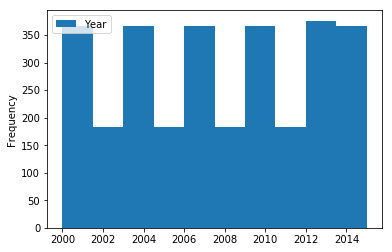

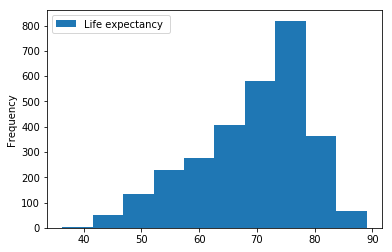

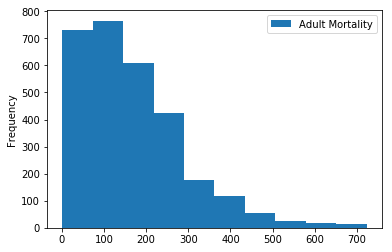

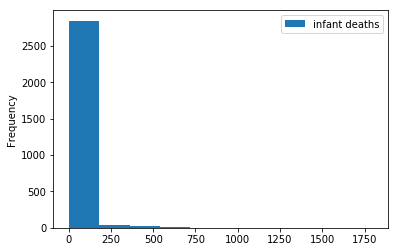

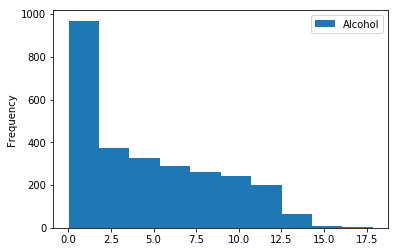

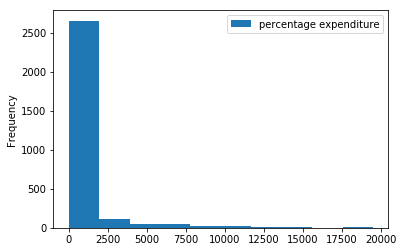

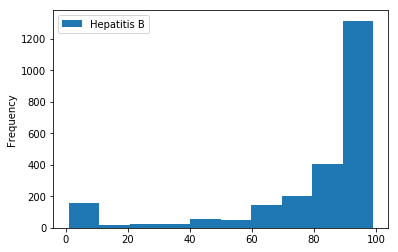

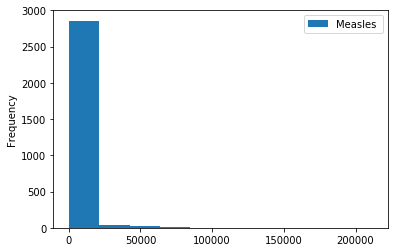

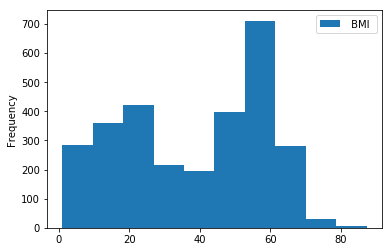

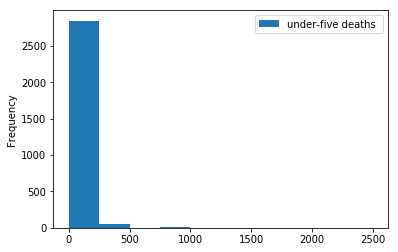

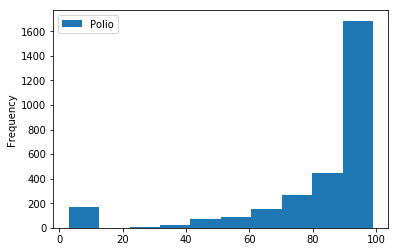

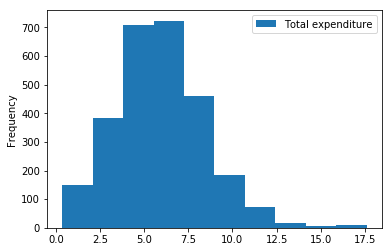

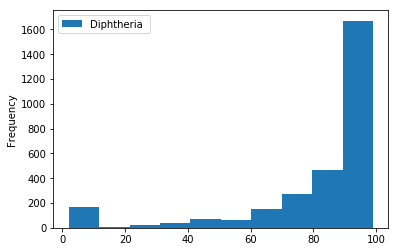

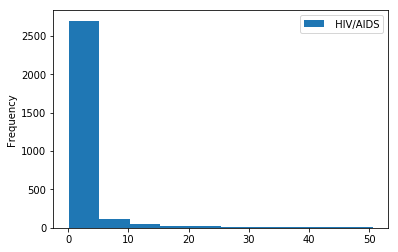

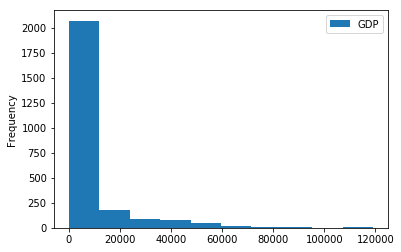

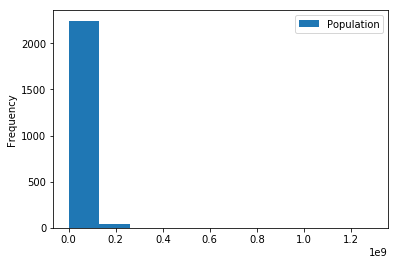

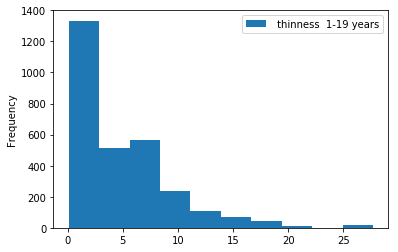

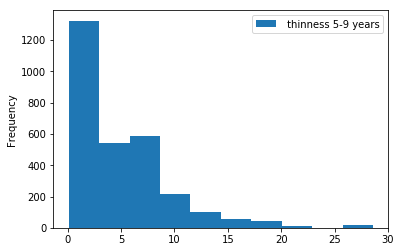

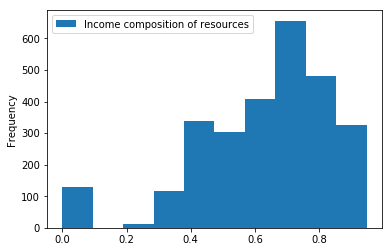

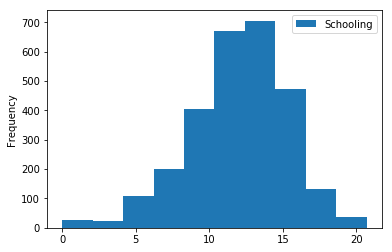

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
numeric_features = [t[0] for t in dataSet.dtypes if t[1] == 'int' or t[1] == 'double']
for i in numeric_features:
    pd.DataFrame(dataSet.select(i).collect(), columns=[i]).plot(kind='hist')


,Status,count
0,Developed,512
1,Developing,2426


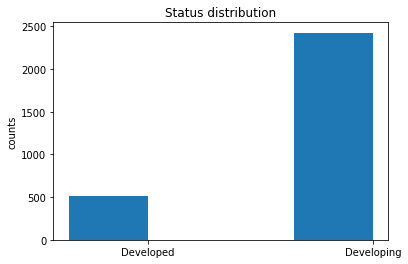

In [5]:
responses = dataSet.groupBy('Status').count().collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width)
 
plt.ylabel('counts')
plt.title('Status distribution')
plt.xticks(ind + width/2., categories)
dataSet.groupby('Status').count().toPandas()

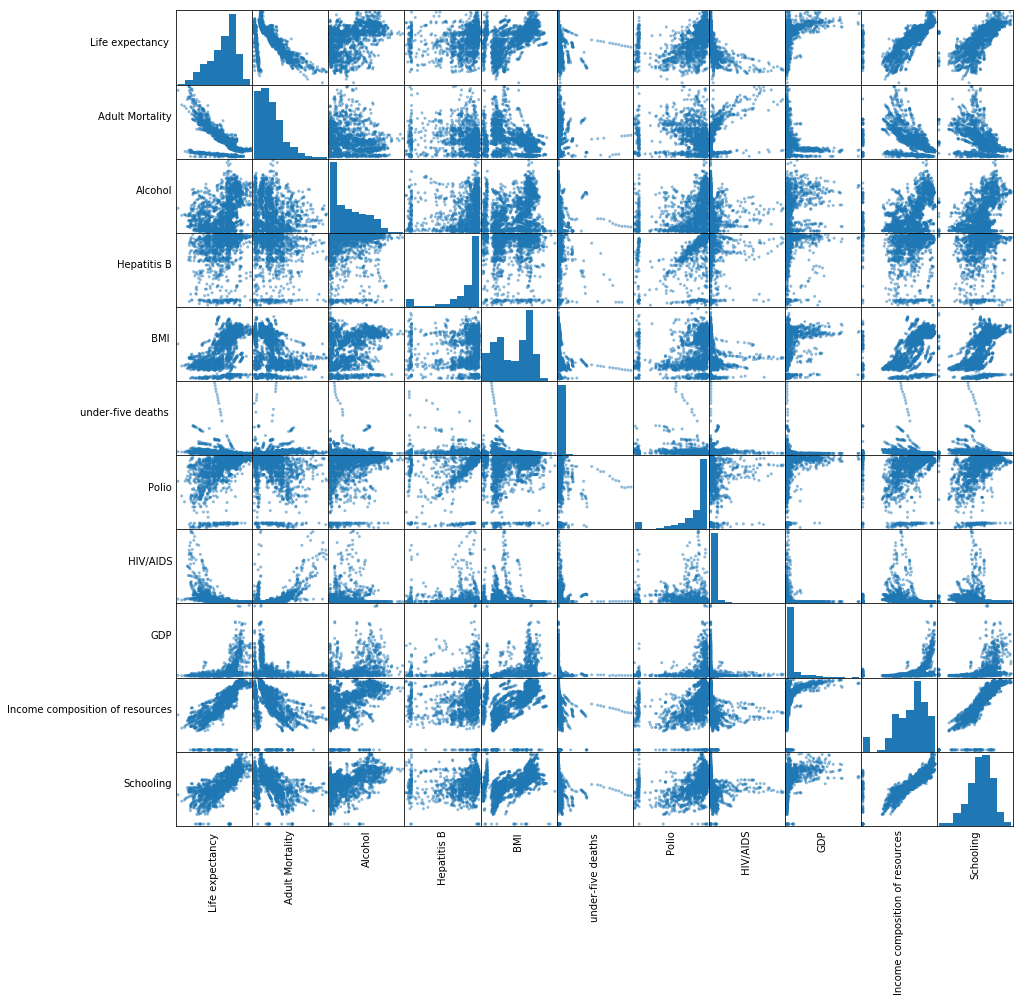

In [6]:
numeric_features = ['Life expectancy ', 'Adult Mortality','Alcohol', 'Hepatitis B', ' BMI ', 'under-five deaths ',
                    'Polio', ' HIV/AIDS', 'GDP', 'Income composition of resources', 'Schooling']
sampled_data = dataSet.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(15, 15))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [7]:
(dataSet.describe()).toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,2938,None,None,Afghanistan,Zimbabwe
Year,2938,2007.5187202178352,4.613840940258099,2000,2015
Status,2938,None,None,Developed,Developing
Life expectancy,2928,69.22493169398912,9.523867487824305,36.3,89.0
Adult Mortality,2928,164.79644808743168,124.2920790034219,1,723
infant deaths,2938,30.303948264125257,117.92650131339906,0,1800
Alcohol,2744,4.6028607871720375,4.052412658755658,0.01,17.87
percentage expenditure,2938,738.2512954533823,1987.914858016194,0.0,19479.91161
Hepatitis B,2385,80.94046121593291,25.070015593018063,1,99


In [8]:
from pyspark.sql.functions import lit, col, when

def replace(column, value):
    return when(column != value, column).otherwise(lit(None))

numeric_features = [t[0] for t in dataSet.dtypes if t[1] == 'int' or t[1] == 'double']
for i in numeric_features:
    dataSet = dataSet.withColumn(i, replace(col(i), 0))                                                                
dataSet.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,2938,None,None,Afghanistan,Zimbabwe
Year,2938,2007.5187202178352,4.613840940258099,2000,2015
Status,2938,None,None,Developed,Developing
Life expectancy,2928,69.22493169398912,9.523867487824305,36.3,89.0
Adult Mortality,2928,164.79644808743168,124.2920790034219,1,723
infant deaths,2090,42.59952153110048,137.94141956620385,1,1800
Alcohol,2744,4.6028607871720375,4.052412658755658,0.01,17.87
percentage expenditure,2327,932.0938143713096,2192.9704497337952,0.09987219,19479.91161
Hepatitis B,2385,80.94046121593291,25.070015593018063,1,99


In [9]:
data_count = (dataSet.describe()).toPandas().loc[0]
columns_to_drop =[column for column in dataSet.columns if int(data_count[column]) < 2600]
data_clean = dataSet.select([column for column in dataSet.columns if column not in columns_to_drop])  
columns_to_drop = ['Country', 'Year']
data_clean = data_clean.select([column for column in data_clean.columns if column not in columns_to_drop])  
(data_clean.describe()).toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Status,2938,None,None,Developed,Developing
Life expectancy,2928,69.22493169398912,9.523867487824305,36.3,89.0
Adult Mortality,2928,164.79644808743168,124.2920790034219,1,723
Alcohol,2744,4.6028607871720375,4.052412658755658,0.01,17.87
BMI,2904,38.32124655647373,20.044033502562083,1.0,87.3
Polio,2919,82.55018842069202,23.428045949468476,3,99
Total expenditure,2712,5.9381895280235915,2.498319672155633,0.37,17.6
Diphtheria,2919,82.32408359027065,23.7169120685726,2,99
HIV/AIDS,2938,1.7421034717494939,5.077784531086547,0.1,50.6


In [10]:
data_clean = data_clean.na.drop(how='any')
(data_clean.describe()).toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Status,2442,None,None,Developed,Developing
Life expectancy,2442,69.50737100737106,9.405228076271225,36.3,89.0
Adult Mortality,2442,161.493447993448,124.96752285208716,1,723
Alcohol,2442,4.602628992629016,4.040110564369994,0.01,17.87
BMI,2442,38.55454545454542,19.740353661924356,1.0,77.1
Polio,2442,83.16052416052416,22.638920441900762,3,99
Total expenditure,2442,5.891777231777224,2.383257377174323,0.37,14.39
Diphtheria,2442,83.22604422604422,22.644983053916732,2,99
HIV/AIDS,2442,1.8806715806715428,5.485061000767595,0.1,50.6


In [11]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import round

status_indexer = StringIndexer(inputCol='Status',outputCol='StatusIndex')
data_fmt = status_indexer.fit(data_clean).transform(data_clean)
data_fmt = data_fmt.drop('Status')

data = data_fmt.withColumn("Life expectancy ", round(col("Life expectancy ")))                           
pd.DataFrame(data.take(5), columns=data.columns)

,Life expectancy,Adult Mortality,Alcohol,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,StatusIndex
0,65.0,263,0.01,19.1,6,8.16,65,0.1,17.2,17.3,0.479,10.1,0.0
1,60.0,271,0.01,18.6,58,8.18,62,0.1,17.5,17.5,0.476,10.0,0.0
2,60.0,268,0.01,18.1,62,8.13,64,0.1,17.7,17.7,0.470,9.9,0.0
3,60.0,272,0.01,17.6,67,8.52,67,0.1,17.9,18.0,0.463,9.8,0.0
4,59.0,275,0.01,17.2,68,7.87,68,0.1,18.2,18.2,0.454,9.5,0.0


In [12]:
corr_matirx = pd.DataFrame()
for col in data.columns:
    corr_matirx.insert(0,col, [data.corr('Life expectancy ', col)])
corr_matirx.T

,0
StatusIndex,0.478026
Schooling,0.776832
Income composition of resources,0.887045
thinness 5-9 years,-0.463730
thinness 1-19 years,-0.467076
HIV/AIDS,-0.579898
Diphtheria,0.462539
Total expenditure,0.181938
Polio,0.451388
BMI,0.567150


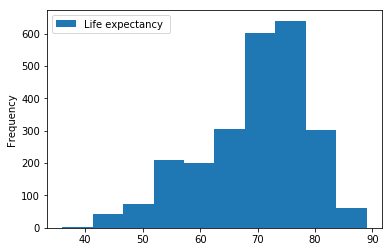

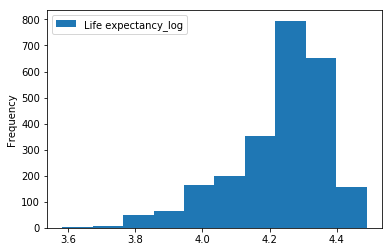

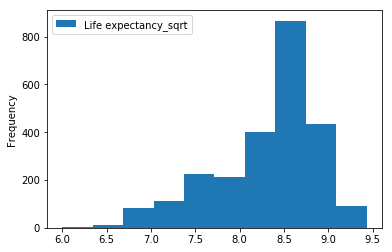

In [13]:
pd.DataFrame(data.select('Life expectancy ').collect(), columns=['Life expectancy ']).plot(kind='hist')
pd.DataFrame(data.select('Life expectancy ').collect(), columns=['Life expectancy_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Life expectancy ').collect(), columns=['Life expectancy_sqrt']).transform(np.sqrt).plot(kind='hist')

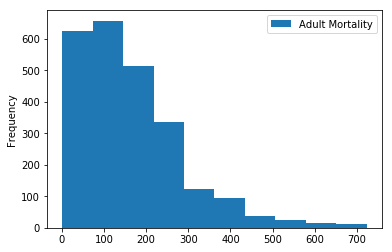

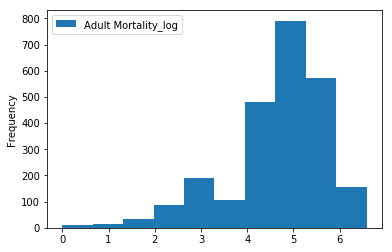

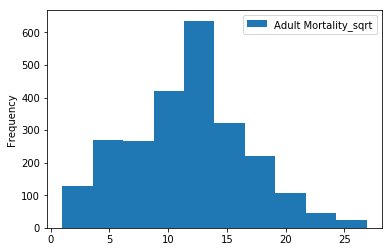

In [14]:
from pyspark.sql.functions import sqrt, sin

pd.DataFrame(data.select('Adult Mortality').collect(), columns=['Adult Mortality']).plot(kind='hist')
pd.DataFrame(data.select('Adult Mortality').collect(), columns=['Adult Mortality_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Adult Mortality').collect(), columns=['Adult Mortality_sqrt']).transform(np.sqrt).plot(kind='hist')

data_tf = data.withColumn('Adult Mortality', sqrt("Adult Mortality"))

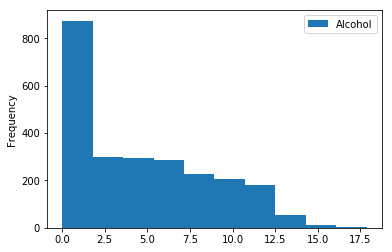

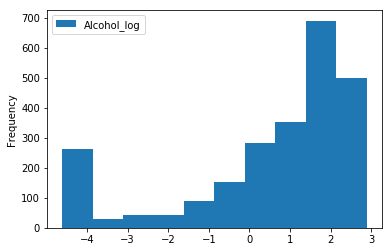

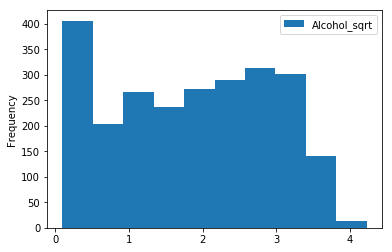

In [15]:
pd.DataFrame(data.select('Alcohol').collect(), columns=['Alcohol']).plot(kind='hist')
pd.DataFrame(data.select('Alcohol').collect(), columns=['Alcohol_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Alcohol').collect(), columns=['Alcohol_sqrt']).transform(np.sqrt).plot(kind='hist')
data_tf = data_tf.withColumn('Alcohol', sqrt("Alcohol"))

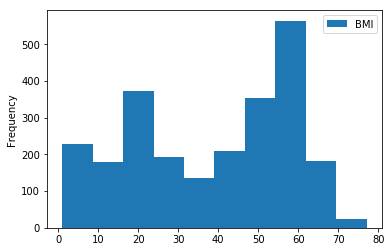

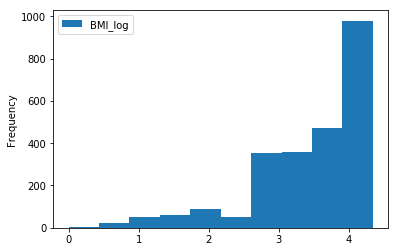

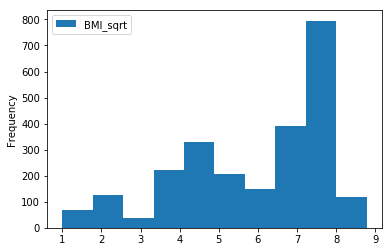

In [16]:
pd.DataFrame(data.select(' BMI ').collect(), columns=['BMI']).plot(kind='hist')
pd.DataFrame(data.select(' BMI ').collect(), columns=['BMI_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select(' BMI ').collect(), columns=['BMI_sqrt']).transform(np.sqrt).plot(kind='hist')

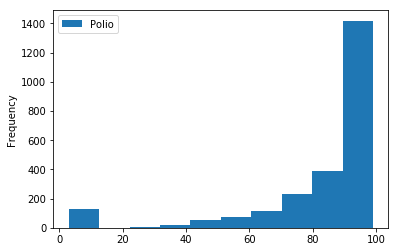

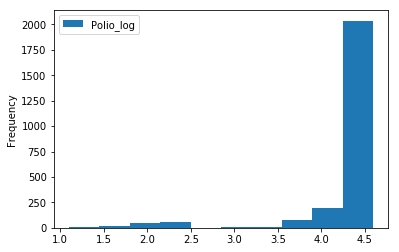

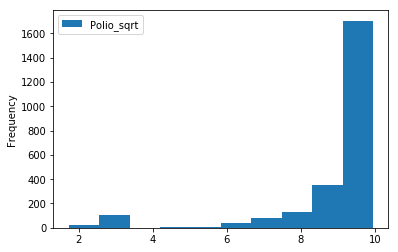

In [17]:
pd.DataFrame(data.select('Polio').collect(), columns=['Polio']).plot(kind='hist')
pd.DataFrame(data.select('Polio').collect(), columns=['Polio_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Polio').collect(), columns=['Polio_sqrt']).transform(np.sqrt).plot(kind='hist')

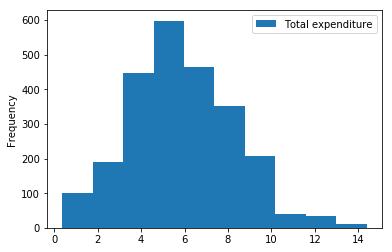

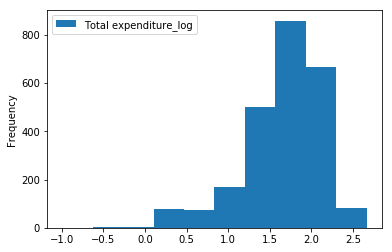

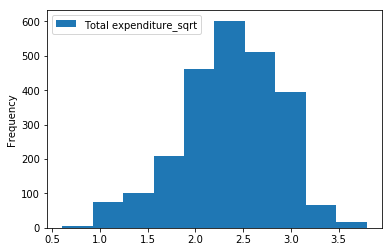

In [18]:
pd.DataFrame(data.select('Total expenditure').collect(), columns=['Total expenditure']).plot(kind='hist')
pd.DataFrame(data.select('Total expenditure').collect(), columns=['Total expenditure_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Total expenditure').collect(), columns=['Total expenditure_sqrt']).transform(np.sqrt).plot(kind='hist')
data_tf = data_tf.withColumn('Total expenditure', sqrt("Total expenditure"))

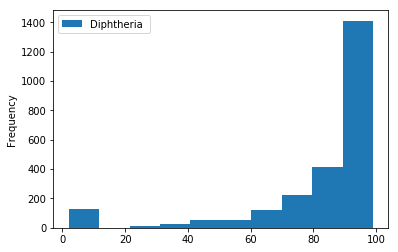

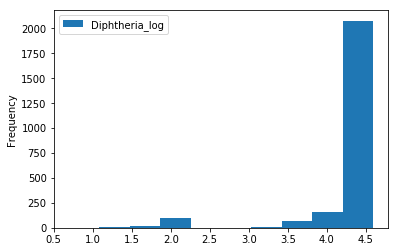

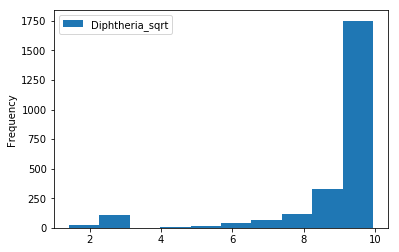

In [19]:
pd.DataFrame(data.select('Diphtheria ').collect(), columns=['Diphtheria ']).plot(kind='hist')
pd.DataFrame(data.select('Diphtheria ').collect(), columns=['Diphtheria_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Diphtheria ').collect(), columns=['Diphtheria_sqrt']).transform(np.sqrt).plot(kind='hist')

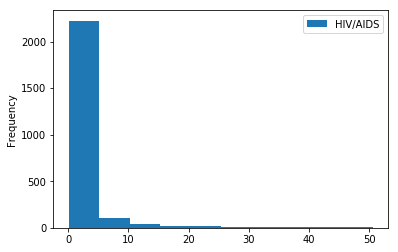

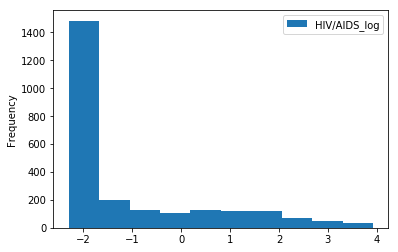

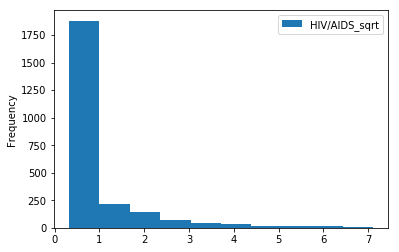

In [20]:
from pyspark.sql.functions import log
pd.DataFrame(data.select(' HIV/AIDS').collect(), columns=['HIV/AIDS']).plot(kind='hist')
pd.DataFrame(data.select(' HIV/AIDS').collect(), columns=['HIV/AIDS_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select(' HIV/AIDS').collect(), columns=['HIV/AIDS_sqrt']).transform(np.sqrt).plot(kind='hist')
data_tf = data_tf.withColumn(' HIV/AIDS', log(" HIV/AIDS"))

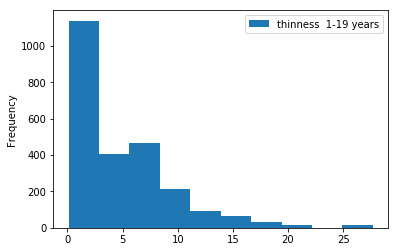

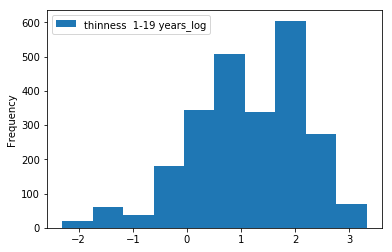

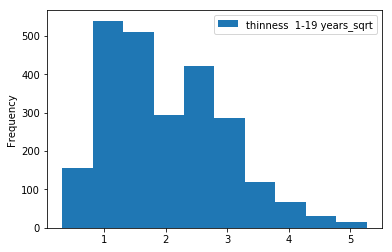

In [21]:
pd.DataFrame(data.select(' thinness  1-19 years').collect(), columns=['thinness  1-19 years']).plot(kind='hist')
pd.DataFrame(data.select(' thinness  1-19 years').collect(), columns=['thinness  1-19 years_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select(' thinness  1-19 years').collect(), columns=['thinness  1-19 years_sqrt']).transform(np.sqrt).plot(kind='hist')

data_tf = data_tf.withColumn(' thinness  1-19 years', log(" thinness  1-19 years"))

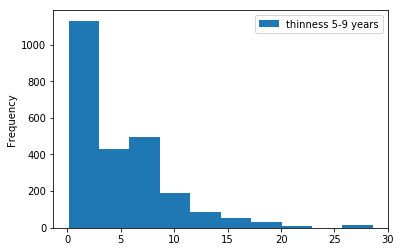

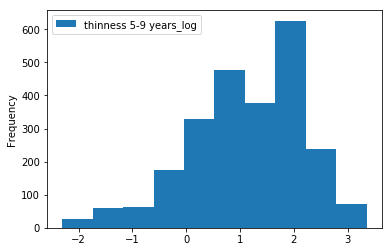

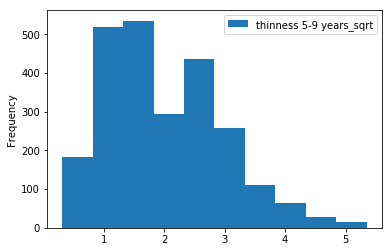

In [22]:
pd.DataFrame(data.select(' thinness 5-9 years').collect(), columns=['thinness 5-9 years']).plot(kind='hist')
pd.DataFrame(data.select(' thinness 5-9 years').collect(), columns=['thinness 5-9 years_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select(' thinness 5-9 years').collect(), columns=['thinness 5-9 years_sqrt']).transform(np.sqrt).plot(kind='hist')

data_tf = data_tf.withColumn(' thinness 5-9 years', log(" thinness 5-9 years"))

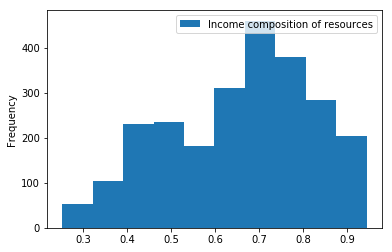

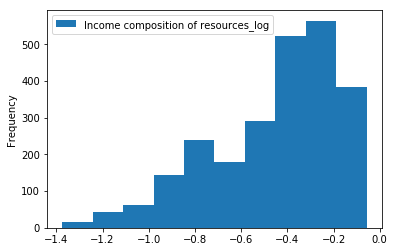

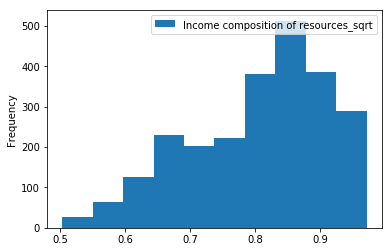

In [23]:
pd.DataFrame(data.select('Income composition of resources').collect(), columns=['Income composition of resources']).plot(kind='hist')
pd.DataFrame(data.select('Income composition of resources').collect(), columns=['Income composition of resources_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Income composition of resources').collect(), columns=['Income composition of resources_sqrt']).transform(np.sqrt).plot(kind='hist')

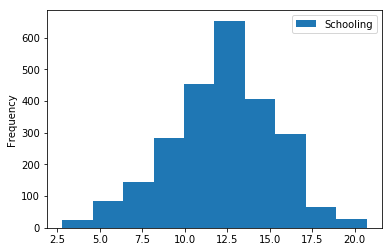

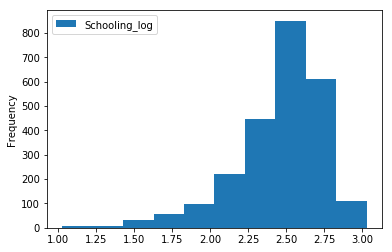

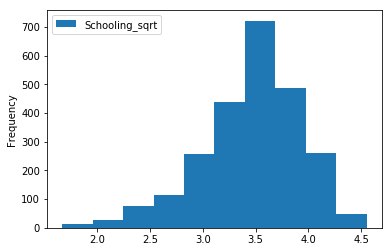

In [24]:
pd.DataFrame(data.select('Schooling').collect(), columns=['Schooling']).plot(kind='hist')
pd.DataFrame(data.select('Schooling').collect(), columns=['Schooling_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Schooling').collect(), columns=['Schooling_sqrt']).transform(np.sqrt).plot(kind='hist')

In [25]:
data_tf.columns

['Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'StatusIndex']

In [26]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

feature_col =  [column for column in data_tf.columns if column != 'Life expectancy '] 
assembler = VectorAssembler(
    inputCols = feature_col,
    outputCol="features")

output = assembler.transform(data_tf)
final_data = output.select("features",'Life expectancy ')
final_data.show()

+--------------------+----------------+
|            features|Life expectancy |
+--------------------+----------------+
|[16.2172747402268...|            65.0|
|[16.4620776331543...|            60.0|
|[16.3707055437449...|            60.0|
|[16.4924225024706...|            60.0|
|[16.583123951777,...|            59.0|
|[16.7032930884900...|            59.0|
|[16.7630546142402...|            59.0|
|[16.9410743460974...|            58.0|
|[17.1755640373176...|            58.0|
|[17.1755640373176...|            57.0|
|[17.0587221092319...|            57.0|
|[17.1172427686236...|            57.0|
|[17.1755640373176...|            57.0|
|[1.73205080756887...|            56.0|
|[17.7763888346311...|            55.0|
|[17.9164728671689...|            55.0|
|[8.60232526704262...|            78.0|
|[2.82842712474619...|            78.0|
|[9.16515138991168...|            77.0|
|[9.27361849549570...|            77.0|
+--------------------+----------------+
only showing top 20 rows



In [27]:
train_data, test_data = final_data.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 1700
Test Dataset Count: 742


Text(0.5,1,'Coefficients in the LinearRegression Model')

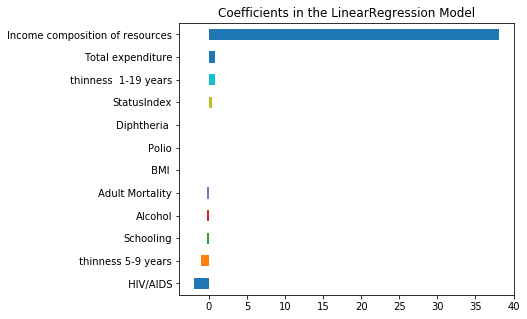

In [28]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(labelCol='Life expectancy ',featuresCol='features')
lr_model = lr.fit(train_data)
lr_coef = pd.Series(lr_model.coefficients, index = feature_col)

plt.rcParams['figure.figsize'] = (6.0, 5.0)
lr_coef.sort_values().plot(kind = "barh")
plt.title("Coefficients in the LinearRegression Model")  

In [29]:
from pyspark.ml.evaluation import RegressionEvaluator
rmse_eva=RegressionEvaluator(predictionCol='prediction',labelCol='Life expectancy ',metricName='rmse')
r2_eva=RegressionEvaluator(predictionCol='prediction',labelCol='Life expectancy ',metricName='r2')

lr_predictions = lr_model.transform(test_data)
lr_predictions.show()
rmse_acc = rmse_eva.evaluate(lr_predictions)
r2_acc = r2_eva.evaluate(lr_predictions)

print('The root mean squared error is: {}'.format(rmse_acc))
print("R2: {}".format(r2_acc))

+--------------------+----------------+------------------+
|            features|Life expectancy |        prediction|
+--------------------+----------------+------------------+
|[1.0,2.3685438564...|            75.0|  76.2258488972347|
|[1.41421356237309...|            63.0| 68.41009266764348|
|[1.73205080756887...|            56.0| 59.44951979848777|
|[2.0,0.5477225575...|            48.0| 53.98746291779411|
|[2.0,1.0862780491...|            54.0| 55.43519497802107|
|[2.0,2.2427661492...|            53.0|57.435825237535056|
|[2.44948974278317...|            82.0| 81.52437224119859|
|[2.44948974278317...|            82.0|  81.6094880440117|
|[2.44948974278317...|            83.0| 82.42979782323081|
|[2.44948974278317...|            82.0| 84.07632679652765|
|[2.64575131106459...|            78.0|  79.2770431685606|
|[2.64575131106459...|            77.0| 78.35962883282372|
|[2.64575131106459...|            84.0| 83.36265491537524|
|[2.64575131106459...|            82.0| 81.7497074452146

Text(0.5,1,'FeatureImportances in the RandomForest Model')

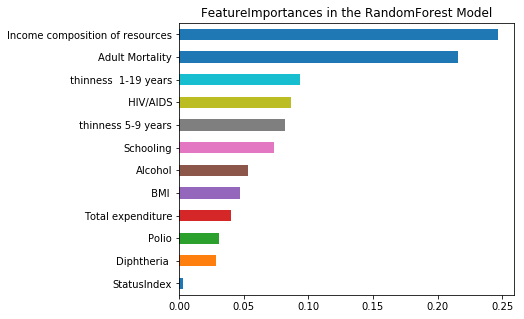

In [30]:
from pyspark.ml.classification import RandomForestClassifier

rfc = RandomForestClassifier(labelCol='Life expectancy ', featuresCol='features')
rfc_model = rfc.fit(train_data)
rfc_coef = pd.Series(rfc_model.featureImportances, index = feature_col)

plt.rcParams['figure.figsize'] = (6.0, 5.0)
rfc_coef.sort_values().plot(kind = "barh")
plt.title("FeatureImportances in the RandomForest Model")  

In [31]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_evaluator = MulticlassClassificationEvaluator(labelCol="Life expectancy ", predictionCol="prediction", metricName="accuracy")
rfc_predictions = rfc_model.transform(test_data)

rfc_predictions.show()

rfc_acc = acc_evaluator.evaluate(rfc_predictions)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))

+--------------------+----------------+--------------------+--------------------+----------+
|            features|Life expectancy |       rawPrediction|         probability|prediction|
+--------------------+----------------+--------------------+--------------------+----------+
|[1.0,2.3685438564...|            75.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      74.0|
|[1.41421356237309...|            63.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      64.0|
|[1.73205080756887...|            56.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      78.0|
|[2.0,0.5477225575...|            48.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      58.0|
|[2.0,1.0862780491...|            54.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      46.0|
|[2.0,2.2427661492...|            53.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      59.0|
|[2.44948974278317...|            82.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      82.0|
|[2.44948974278317...|            82.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0

Text(0.5,1,'FeatureImportances in the GBT Model')

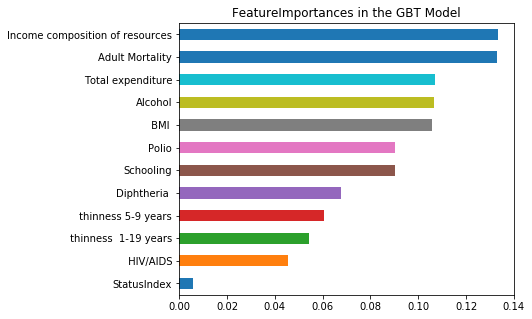

In [95]:
from pyspark.ml.regression import GBTRegressor
gbt=GBTRegressor(labelCol='Life expectancy ',featuresCol='features',
                 maxDepth=6,maxIter=25,stepSize=0.2,maxBins=25)
gbt_model = gbt.fit(train_data)
gbt_coef = pd.Series(gbt_model.featureImportances, index = feature_col)

plt.rcParams['figure.figsize'] = (6.0, 5.0)
gbt_coef.sort_values().plot(kind = "barh")
plt.title("FeatureImportances in the GBT Model")

In [96]:
pd.DataFrame({'factors':gbt_coef.index, 'values':gbt_coef.values})

,factors,values
0,Adult Mortality,0.132829
1,Alcohol,0.106643
2,BMI,0.105725
3,Polio,0.090339
4,Total expenditure,0.107198
5,Diphtheria,0.067557
6,HIV/AIDS,0.045445
7,thinness 1-19 years,0.054279
8,thinness 5-9 years,0.060524
9,Income composition of resources,0.133390


In [97]:
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.show()
rmse_acc = rmse_eva.evaluate(gbt_predictions)
r2_acc = r2_eva.evaluate(gbt_predictions)

print('The root mean squared error is: {}'.format(rmse_acc))
print("R2: {}".format(r2_acc))

+--------------------+----------------+-----------------+
|            features|Life expectancy |       prediction|
+--------------------+----------------+-----------------+
|[1.0,2.3685438564...|            75.0|75.85492238028796|
|[1.41421356237309...|            63.0|63.61111716648731|
|[1.73205080756887...|            56.0|55.97329442100263|
|[2.0,0.5477225575...|            48.0|55.44383470573102|
|[2.0,1.0862780491...|            54.0|56.15053246163608|
|[2.0,2.2427661492...|            53.0|56.98814734519049|
|[2.44948974278317...|            82.0|83.67102896117599|
|[2.44948974278317...|            82.0|83.67102896117599|
|[2.44948974278317...|            83.0|83.37368853236516|
|[2.44948974278317...|            82.0|81.82811004694108|
|[2.64575131106459...|            78.0|76.88494203622223|
|[2.64575131106459...|            77.0| 76.9057215262454|
|[2.64575131106459...|            84.0|84.22301143595104|
|[2.64575131106459...|            82.0|80.49235339910939|
|[2.6457513110